https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg

3D可視化:  
https://meep.readthedocs.io/en/latest/Python_Tutorials/Basics/

In [1]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lengthPhC = 30
widthPhC = 10

ConnectionWaveguide = 5
length = lengthPhC + 2*ConnectionWaveguide
width = widthPhC

# Si厚さ
hslab = 0.5

# 空気層
h=5

wgi = 1
Nx = int(lengthPhC)
Ny = int(widthPhC)
r = 1/4
eps = 11.7

cell = mp.Vector3(length,width*np.sqrt(3),h)

blk = mp.Block(mp.Vector3(lengthPhC,widthPhC*np.sqrt(3),hslab),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=eps))

waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),hslab),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=eps))
geometry = [blk]
geometry.append(waveguide)

for j in range(Ny):
    for i in range(Nx+1):
        shift_y = np.sqrt(3)
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, wgi*np.sqrt(3)/2 + shift_y*j), height = hslab))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, -(wgi*np.sqrt(3)/2 + shift_y*j)), height = hslab))
        
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, wgi*np.sqrt(3)/2 + shift_y*(j+1/2)), height = hslab))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, -(wgi*np.sqrt(3)/2 + shift_y*(j+1/2))), height = hslab))
        #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))


sources = [mp.Source(mp.ContinuousSource(frequency=0.3),
                     component=mp.Hz,
                     center=mp.Vector3(-length/2 +1, 0, 0))]

pml_layers = [mp.PML(1.0)]

resolution = 16


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    dimensions=3,
                    resolution=resolution)
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.00128293 s
Working in 3D dimensions.
Computational cell is 40 x 17.3125 x 5 with resolution 16
     block, center = (0,0,0)
          size (30,17.3205,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     block, center = (0,0,0)
          size (1e+20,1.73205,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
     cylinder, center = (-15,0.866025,0)
          radius 0.25, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-15,-0.866025,0)
          radius 0.25, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-15.5,1.73205,0)
          radius 0.25, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-15.5,-1.73205,0)
     

## Transmittance

In [3]:
def phc_trans(PhC = True, lengthPhC = 20, resolution = 8, checkpoint=0):
    #checkpoint = 0 #lengthPhC/2-3/2
    widthPhC = 10

    ConnectionWaveguide = 5
    length = lengthPhC + 2*ConnectionWaveguide
    width = widthPhC

    # Si厚さ
    hslab = 0.5
    # 空気層
    h=10
    
    wgi = 1
    Nx = int(lengthPhC)
    Ny = int(widthPhC)
    r = 1/4
    eps = 11.7

    cell = mp.Vector3(length,width*np.sqrt(3),h)
    
    if PhC == False:
        waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),hslab),
                                 center=mp.Vector3(0, 0),
                                 material=mp.Medium(epsilon=eps))
        geometry = [waveguide]
    
    if PhC == True:
        blk = mp.Block(mp.Vector3(lengthPhC,widthPhC*np.sqrt(3),hslab),
                             center=mp.Vector3(),
                             material=mp.Medium(epsilon=eps))

        waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),hslab),
                             center=mp.Vector3(),
                             material=mp.Medium(epsilon=eps))
        geometry = [blk]
        geometry.append(waveguide)

        for j in range(Ny):
            for i in range(Nx+1):
                shift_y = np.sqrt(3)
                geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, wgi*np.sqrt(3)/2 + shift_y*j), height = hslab))
                geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, -(wgi*np.sqrt(3)/2 + shift_y*j)), height = hslab))

                geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, wgi*np.sqrt(3)/2 + shift_y*(j+1/2)), height = hslab))
                geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, -(wgi*np.sqrt(3)/2 + shift_y*(j+1/2))), height = hslab))
                #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))

    fcen = 0.3   # pulse center frequency
    df = 0.2       # pulse frequency width
    sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                         component=mp.Hz,
                         center=mp.Vector3(-length/2 +1, 0),
                         size=mp.Vector3(0,wgi*np.sqrt(3), hslab))
              ]

    pml_layers = [mp.PML(1.0)]
    symmetries = [mp.Mirror(mp.Z,+1)]

    sim = mp.Simulation(cell_size=cell,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=sources,
                        dimensions=3,
                        symmetries=symmetries,
                        resolution=resolution)

    # show geometry (xmingの起動必須)
    sim.init_sim()
    eps_data = sim.get_epsilon()
    from mayavi import mlab
    s = mlab.contour3d(eps_data, colormap="YlGnBu")
    mlab.show()

    tran_out = mp.FluxRegion(center=mp.Vector3(length/2-3/2, 0, 0),size=mp.Vector3(0, 2*wgi, hslab))
    nfreq = 500 # number of frequencies at which to compute flux
    
    #trans_in = sim.add_flux(fcen, df, nfreq, tran_in)
    trans_out = sim.add_flux(fcen, df, nfreq, tran_out)

    sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Hz, mp.Vector3(checkpoint, 0, 0), 1e-2))

    freqs = mp.get_flux_freqs(trans_out)
    #psd_in = mp.get_fluxes(trans_in)
    psd_out = mp.get_fluxes(trans_out)

    return freqs, psd_out

In [7]:
freqs_wo, psd_out_wo = phc_trans(PhC = False, lengthPhC = 20,resolution=8, checkpoint=10)
#freqs_w,  psd_out_w  = phc_trans(PhC = True, lengthPhC = 60, resolution=8, checkpoint=0)

-----------
Initializing structure...
Halving computational cell along direction z
time for choose_chunkdivision = 0.00194001 s
Working in 3D dimensions.
Computational cell is 30 x 17.375 x 10 with resolution 8
     block, center = (0,0,0)
          size (1e+20,1.73205,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.7,11.7,11.7)
time for set_epsilon = 2.45737 s
-----------
on time step 54 (time=3.375), 0.0745196 s/step
on time step 159 (time=9.9375), 0.0384223 s/step
on time step 264 (time=16.5), 0.0383183 s/step
on time step 364 (time=22.75), 0.0404468 s/step
on time step 464 (time=29), 0.0400761 s/step
on time step 560 (time=35), 0.0420739 s/step
on time step 661 (time=41.3125), 0.0398141 s/step
on time step 764 (time=47.75), 0.0390968 s/step
field decay(t = 50.0625): 2.1172029498391038e-05 / 2.1172029498391038e-05 = 1.0
on time step 864 (time=54), 0.0402443 s/step
on time step 965 (time=60.3125), 0.0400089 s/step
on time step 1066 (

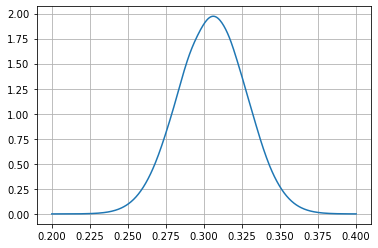

In [8]:
plt.plot(freqs_wo,psd_out_wo)
plt.grid(True)

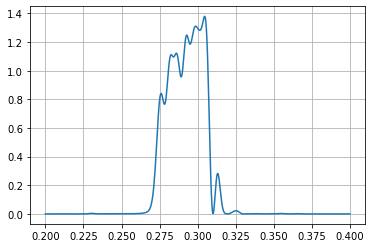

In [6]:
plt.plot(freqs_w,psd_out_w)
plt.grid(True)

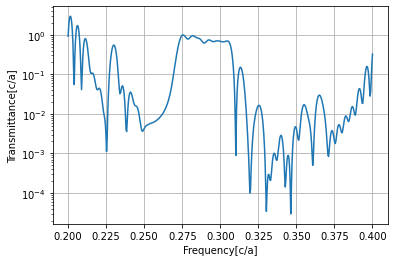

In [13]:
plt.plot(np.array(freqs_w), np.array(psd_out_w)/np.array(psd_out_wo))
plt.xlabel("Frequency[c/a]")
plt.ylabel("Transmittance[c/a]")
#plt.xlim([0.28,0.30])
plt.yscale('log')
plt.grid(True)

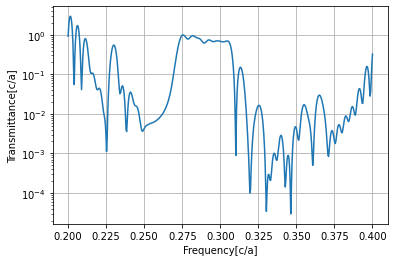

In [10]:
plt.plot(np.array(freqs_w), np.array(psd_out_w)/np.array(psd_out_wo))
plt.xlabel("Frequency[c/a]")
plt.ylabel("Transmittance[c/a]")
#plt.xlim([0.28,0.30])
plt.yscale('log')
plt.grid(True)

In [11]:
import time

ut = time.time()
tmp = np.array([freqs_wo, psd_out_wo,  psd_out_w]).T
np.savetxt("W1wg_60a_h10_resolution8_" + "{}.csv".format(ut), tmp, delimiter=',')

In [8]:
tmp = np.loadtxt("W1wg_40a_h10_resolution8_1596810993.935236.csv",delimiter=",")

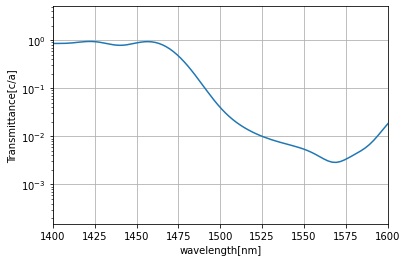

In [20]:
a = 400
c_const = 299792458

list_freq = (a * 1e-9) / tmp[:,0] * 1e9
plt.plot(list_freq, tmp[:,2]/tmp[:,1])

plt.xlim(1400,1600)
plt.xlabel("wavelength[nm]")
plt.ylabel("Transmittance[c/a]")
#plt.xlim([0.28,0.30])
plt.yscale('log')
plt.grid(True)